# Analyzing Motorcyle Sales Data

## Data Munging

**Importing libraries**

In [1]:
#allows plots to be displayed in notebooks and not on a new window
%matplotlib inline 
import numpy as np
import pandas as pd

**Reading the motorcycles sales data**

In [3]:
sales  = pd.read_csv("sales.csv")

In [5]:
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,1/6/2021,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,1/6/2021,North,Retail,Breaking system,9,19.29,173.61,Cash
2,1/6/2021,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,1/6/2021,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,1/6/2021,Central,Retail,Engine,2,60.48,120.96,Credit card


In [6]:
sales.dtypes

date             object
warehouse        object
client_type      object
product_line     object
quantity          int64
unit_price      float64
total           float64
payment          object
dtype: object

**Viewing the first 5 rows of the data**

In [37]:
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,01/06/2021,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,01/06/2021,North,Retail,Breaking system,9,19.29,173.61,Cash
2,01/06/2021,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,01/06/2021,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,01/06/2021,Central,Retail,Engine,2,60.48,120.96,Credit card


**Determine the number of rows and columns in the dataset**

In [7]:
sales.shape

(1000, 8)

**Get column names in the dataset**

In [9]:
sales.columns

Index(['date', 'warehouse', 'client_type', 'product_line', 'quantity',
       'unit_price', 'total', 'payment'],
      dtype='object')

**Get the first five rows of a column by name**

In [11]:
sales["client_type"][0:6]

0       Retail
1       Retail
2       Retail
3    Wholesale
4       Retail
5    Wholesale
Name: client_type, dtype: object

In [40]:
sales["warehouse"][1:5]

1      North
2      North
3      North
4    Central
Name: warehouse, dtype: object

**Create categorical ranges for numerical data**

In [14]:
price_range = pd.cut(sales["total"],20)
price_range[:5]

0      (7.814, 137.149]
1    (137.149, 263.948]
2    (137.149, 263.948]
3    (517.546, 644.345]
4      (7.814, 137.149]
Name: total, dtype: category
Categories (20, interval[float64, right]): [(7.814, 137.149] < (137.149, 263.948] < (263.948, 390.747] < (390.747, 517.546] ... (2039.134, 2165.933] < (2165.933, 2292.732] < (2292.732, 2419.531] < (2419.531, 2546.33]]

In [12]:
sales["total"]

0      134.83
1      173.61
2      263.45
3      605.44
4      120.96
        ...  
995    295.83
996    320.96
997    393.64
998    241.23
999    548.13
Name: total, Length: 1000, dtype: float64

**Value counts in the ranges created above**

In [15]:
pd.value_counts(price_range)

(7.814, 137.149]        390
(137.149, 263.948]      291
(263.948, 390.747]      117
(390.747, 517.546]       61
(517.546, 644.345]       37
(771.144, 897.943]       20
(644.345, 771.144]       17
(1024.742, 1151.541]     15
(897.943, 1024.742]      13
(1151.541, 1278.34]      10
(1405.139, 1531.938]      8
(1658.737, 1785.536]      5
(1531.938, 1658.737]      5
(1278.34, 1405.139]       4
(2165.933, 2292.732]      3
(1785.536, 1912.335]      2
(2292.732, 2419.531]      1
(2419.531, 2546.33]       1
(1912.335, 2039.134]      0
(2039.134, 2165.933]      0
Name: total, dtype: int64

**Index the columns of the first row**

In [51]:
sales.iloc[0,:]

date               01/06/2021
warehouse             Central
client_type            Retail
product_line    Miscellaneous
quantity                    8
unit_price              16.85
total                  134.83
payment           Credit card
Name: 0, dtype: object

In [19]:
sales.loc[4,:]

date               1/6/2021
warehouse           Central
client_type          Retail
product_line         Engine
quantity                  2
unit_price            60.48
total                120.96
payment         Credit card
Name: 4, dtype: object

**Order the data by a specifiec column**

In [20]:
sales["total"].sort_values()

274      10.35
576      10.42
65       10.46
262      10.90
874      10.92
        ...   
799    2186.16
316    2232.66
48     2282.82
704    2324.20
774    2546.33
Name: total, Length: 1000, dtype: float64

**Sort data by a column and obtain a cross-section of the data**

In [24]:
sorted_data = sales.sort_values(["quantity"], ascending=True)
sorted_data

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
369,3/7/2021,North,Retail,Engine,1,53.06,53.06,Credit card
817,11/8/2021,West,Retail,Breaking system,1,17.75,17.75,Credit card
177,18/06/2021,West,Retail,Electrical system,1,23.24,23.24,Credit card
412,7/7/2021,West,Retail,Miscellaneous,1,22.07,22.07,Credit card
898,18/08/2021,Central,Retail,Breaking system,1,13.94,13.94,Credit card
...,...,...,...,...,...,...,...,...
493,13/07/2021,Central,Wholesale,Suspension & traction,40,35.06,1402.53,Transfer
755,6/8/2021,North,Wholesale,Suspension & traction,40,40.11,1604.33,Transfer
360,3/7/2021,North,Wholesale,Breaking system,40,15.52,620.87,Transfer
416,7/7/2021,Central,Wholesale,Electrical system,40,20.98,839.33,Transfer


In [59]:
sorted_data = sales.sort_values(["total"], ascending=False)
sorted_data.iloc[:,:].head(5)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
774,08/08/2021,Central,Wholesale,Engine,40,63.66,2546.33,Transfer
704,02/08/2021,North,Wholesale,Engine,40,58.10,2324.20,Transfer
48,06/06/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
316,28/06/2021,Central,Wholesale,Engine,36,62.02,2232.66,Transfer
799,10/08/2021,Central,Wholesale,Engine,36,60.73,2186.16,Transfer


**Obtain Value Counts of all columns**

In [26]:
sales["product_line"].value_counts()

Breaking system          230
Suspension & traction    228
Electrical system        193
Frame & body             166
Miscellaneous            122
Engine                    61
Name: product_line, dtype: int64

In [63]:
sales["warehouse"].value_counts(), sales["product_line"].value_counts(), sales["client_type"].value_counts()

(Central    480
 North      340
 West       180
 Name: warehouse, dtype: int64,
 Breaking system          230
 Suspension & traction    228
 Electrical system        193
 Frame & body             166
 Miscellaneous            122
 Engine                    61
 Name: product_line, dtype: int64,
 Retail       775
 Wholesale    225
 Name: client_type, dtype: int64)

**Order the data by a specified column**

In [66]:
sales.dtypes

date             object
warehouse        object
client_type      object
product_line     object
quantity          int64
unit_price      float64
total           float64
payment          object
dtype: object

**Get the unique value of a column by names**

In [27]:
sales["product_line"].unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

**Get the unique count of the unique values of a column**

In [68]:
len(sales["product_line"].unique())

6

**Index into a column and get the first four rows**

In [28]:
sales.loc[0:10,["total","payment"]]

,total,payment
0,134.83,Credit card
1,173.61,Cash
2,263.45,Credit card
3,605.44,Transfer
4,120.96,Credit card
5,1494.80,Transfer
6,54.41,Credit card
7,224.38,Credit card
8,1579.87,Transfer
9,272.61,Credit card


## Data Aggregration

**Describe data**

In [29]:
sales.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [78]:
pd.crosstab(sales["warehouse"],sales["client_type"]),pd.crosstab(sales["product_line"],sales["client_type"])

(client_type  Retail  Wholesale
 warehouse                     
 Central         371        109
 North           263         77
 West            141         39,
 client_type            Retail  Wholesale
 product_line                            
 Breaking system           175         55
 Electrical system         155         38
 Engine                     48         13
 Frame & body              128         38
 Miscellaneous              92         30
 Suspension & traction     177         51)

In [30]:
pd.crosstab(sales["warehouse"],sales["client_type"])

client_type,Retail,Wholesale
warehouse,,
Central,371,109
North,263,77
West,141,39


**Return the subset of a data**

In [35]:
sales[(sales["total"] > 1000) & (sales["warehouse"] == "Central")].head().

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
48,6/6/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
60,7/6/2021,Central,Wholesale,Suspension & traction,40,28.64,1145.47,Transfer
141,15/06/2021,Central,Wholesale,Engine,28,63.54,1779.07,Transfer
146,15/06/2021,Central,Wholesale,Frame & body,24,48.95,1174.88,Transfer
176,18/06/2021,Central,Wholesale,Frame & body,36,48.44,1743.78,Transfer


In [89]:
subset = sales[(sales["total"] > 1000) & (sales["warehouse"] == "Central")].head()
subset

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
48,06/06/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
60,07/06/2021,Central,Wholesale,Suspension & traction,40,28.64,1145.47,Transfer
141,15/06/2021,Central,Wholesale,Engine,28,63.54,1779.07,Transfer
146,15/06/2021,Central,Wholesale,Frame & body,24,48.95,1174.88,Transfer
176,18/06/2021,Central,Wholesale,Frame & body,36,48.44,1743.78,Transfer


**Obtaining the average sales made in each warehouse and payment**

In [38]:
sales.groupby(["client_type","payment"]).mean()["total"]

client_type  payment    
Retail       Cash           165.509483
             Credit card    167.331669
Wholesale    Transfer       709.521467
Name: total, dtype: float64

## Visualization

**Number of sales made by payment type**

<AxesSubplot:>

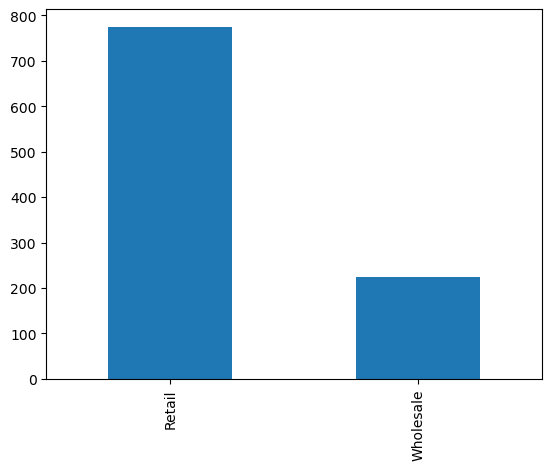

In [39]:
sales.client_type.value_counts().plot(kind = "bar")

<AxesSubplot: >

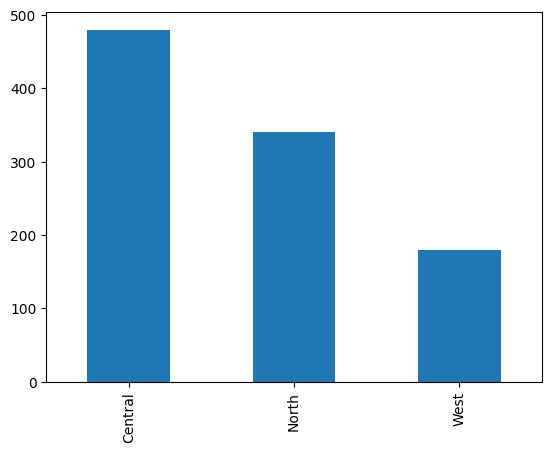

In [5]:
sales.warehouse.value_counts().plot(kind = "bar")

**Total sales made from each payment method**

<AxesSubplot:xlabel='warehouse'>

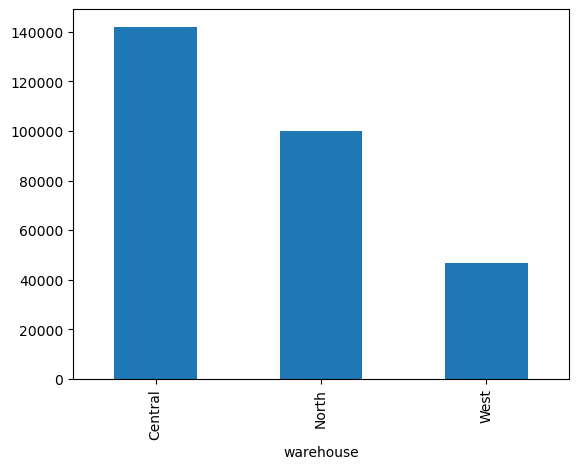

In [41]:
sales.groupby("warehouse")["total"].agg(np.sum).plot(kind = "bar")

In [ ]:
conda install numpy
conda install pandas
conda install matplotlib